# POSTTEST 6 Kecerdasan Buatan
---
(*2109106063* - Zahra Salsabila - B121)

## Melihat Data

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("Train.csv")
df2 = pd.read_csv("Test.csv")
df = pd.concat([df1, df2])
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


## Data Preprocessing
---
### Melakukan Data Cleaning

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
# Membuat imputer untuk mengganti nilai null pada attribut dengan nilai mean
float_imputer = SimpleImputer(missing_values = pd.NA, strategy = 'mean')
df[['Work_Experience', 'Family_Size']] = float_imputer.fit_transform(df[['Work_Experience', 'Family_Size']])
# Membuat imputer untuk mengganti nilai null pada attribut dengan nilai modus
text_imputer = SimpleImputer(missing_values = pd.NA, strategy = 'most_frequent')
df[['Ever_Married', 'Graduated', 'Profession', 'Var_1']] = text_imputer.fit_transform(df[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])
# Menghapus nilai duplikat
df.drop_duplicates(inplace=True)

- Melihat jumlah nilai null

In [5]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

- Melihat jumlah nilai duplikat

In [6]:
df.duplicated().sum()

0

- Menghapus kolom ID

In [7]:
del df['ID']

### Mengubah Data Kategorikal Menjadi Numerikal Dengan Ordinal Encoding

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
encoder = OrdinalEncoder()
df[["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"]] = encoder.fit_transform(df[["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"]])

In [10]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1.0,0.0,22,0.0,5.0,1.000000,2.0,4.0,3.0,3.0
1,0.0,1.0,38,1.0,2.0,2.619777,0.0,3.0,3.0,0.0
2,0.0,1.0,67,1.0,2.0,1.000000,2.0,1.0,5.0,1.0
3,1.0,1.0,67,1.0,7.0,0.000000,1.0,2.0,5.0,1.0
4,0.0,1.0,40,1.0,3.0,2.619777,1.0,6.0,5.0,0.0


### Mengubah Atribut Dengan Tipe Data Float Menjadi Integer

In [11]:
df[['Gender','Ever_Married','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1', 'Segmentation']] = df[['Gender','Ever_Married','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1', 'Segmentation']].astype(int)

In [12]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,2,0,3,3,0
2,0,1,67,1,2,1,2,1,5,1
3,1,1,67,1,7,0,1,2,5,1
4,0,1,40,1,3,2,1,6,5,0


## Membuat Model DNN
---
### Split Dataset Menjadi Train dan Test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Sequential Model

- Import library

In [15]:
import tensorflow as tf
from keras import Sequential, layers

- Melihat jumlah baris dan kolom pada feature

In [16]:
X.shape

(10657, 9)

- Melihat nilai unik pada target

In [17]:
y.unique()

array([3, 0, 1, 2])

- Membuat Sequential model

In [18]:
model = Sequential([
    layers.Dense(16, activation = 'relu', input_shape= [9]),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(4, activation = 'softmax'),
])

- Menampilkan detail parameter pada setiap layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 836 (3.27 KB)
Trainable params: 836 (3.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Melakukan Compile Model

In [20]:
model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

### Melakukan Fit Model

- Membuat fungsi callbacks

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

- Fit model

In [22]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, callbacks=[callback], validation_data=(X_test, y_test))

Epoch 1/100
134/134 [==============================] - 3s 9ms/step - loss: 1.5551 - accuracy: 0.3062 - val_loss: 1.2976 - val_accuracy: 0.3668
Epoch 2/100
134/134 [==============================] - 1s 5ms/step - loss: 1.2840 - accuracy: 0.3893 - val_loss: 1.2585 - val_accuracy: 0.4029
Epoch 3/100
134/134 [==============================] - 1s 5ms/step - loss: 1.2562 - accuracy: 0.4208 - val_loss: 1.2330 - val_accuracy: 0.4456
Epoch 4/100
134/134 [==============================] - 1s 5ms/step - loss: 1.2399 - accuracy: 0.4355 - val_loss: 1.2208 - val_accuracy: 0.4367
Epoch 5/100
134/134 [==============================] - 1s 5ms/step - loss: 1.2344 - accuracy: 0.4339 - val_loss: 1.2106 - val_accuracy: 0.4583
Epoch 6/100
134/134 [==============================] - 1s 5ms/step - loss: 1.2282 - accuracy: 0.4382 - val_loss: 1.2296 - val_accuracy: 0.4207
Epoch 7/100
134/134 [==============================] - 1s 5ms/step - loss: 1.2292 - accuracy: 0.4412 - val_loss: 1.2062 - val_accuracy: 0.4629

### Melakukan Evaluasi Model

In [23]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 3ms/step - loss: 1.2007 - accuracy: 0.4625


[1.2006994485855103, 0.46247655153274536]

### Menampilkan grafik pergerakan metrik akurasi dan loss terhadap epoch

- Import library

In [24]:
import matplotlib.pyplot as plt

- Menampilkan grafik pergerakan metrik akurasi terhadap epoch

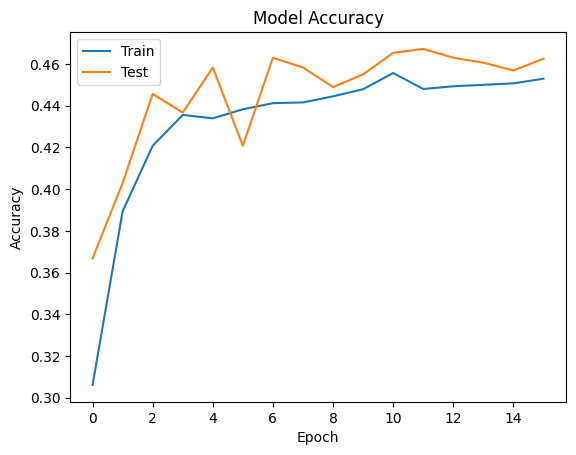

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

- Menampilkan grafik pergerakan metrik loss terhadap epoch

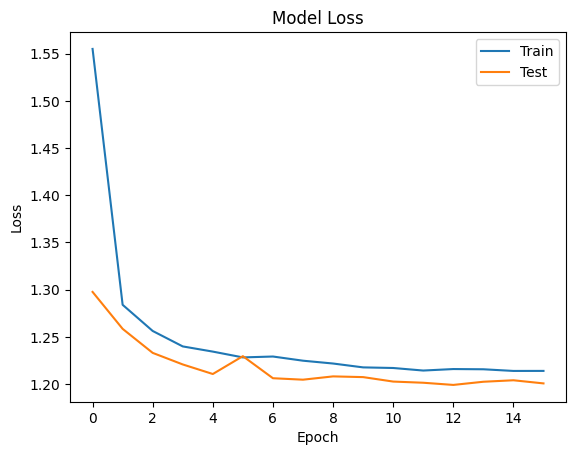

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()